In [1]:
import ciw
import matplotlib.pyplot as plt 
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)
#plt.figure(figsize=(20,10))
import matplotlib 
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)


In [2]:
import math 
##### M/M/1##########
def m_m_1(𝜆,µ,c=1):
    𝜌 = 𝜆/µ
    p0 = 1 - 𝜌
    lq = 𝜌**2/(1-𝜌)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W) 

##### x! ##########
def factorial(x):
    if (x == 1) or (x==0):
        return 1
    else:
        # recursive call to the function
        return (x * factorial(x-1)) 

###################
def user_defined_sum(c,𝜌):
    sum = 0
    for n in range(c):
        sum += (c*𝜌)**n/factorial(n) 

    return 1/(sum + (c*𝜌)**c/(factorial(c)*(1-𝜌)))

##### M/M/c ##########
def m_m_c(𝜆,µ,c):
    𝜌 = 𝜆/(c*µ)
    p0 = user_defined_sum(c,𝜌)
    lq = (c*𝜌)**c*p0*𝜌/(factorial(c)*(1-𝜌)**2)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W) 

######## G/G/C ###########
def g_g_c(s,cv_s,a,cv_a,c):

    𝜌 = s/(c*a)
    wq = s/c * (cv_a**2+cv_s**2)/2 * 𝜌**(-1+math.sqrt(2*(c+1)))/(1- 𝜌)
    
    W = wq + s 
    L = W * 𝜆
    lq = wq * 𝜆
    return(𝜌,lq,wq,L,W)   

# Q1. How can the kidney transplant wait list problem be illustrated as a queuing model? (elaborate on how you would define the requirements for a queueing model, such as the service rate, arrival rate, etc.)

The problem is an exemplary case of highly congested queueing system.

Arrival rates are the average number of patients that enter the transplant wait-lists. 

We assume (1) exponential inter-arrival times and (2) their inverse, the arrival rates of patients/day or patient/year are Poisson-distributed. 

The time it takes to a secure a new organ since the last transplant, or the average time a patient remains as the first in line for a transplant is service time. 

We assume the organ availability interval is exponential; we also assume that its inverse, the service rate (transplants/year) is Poisson-distributed.

We also assume the system is congested enough that it approximate a first-in, first out arrival discipline. 


# Q2 . How busy are the systems in terms of their utilization rates?

# London

In [3]:
### London 
scale_arrival_london =  109.025
scale_service_london = 110.047
c=1 

𝜌,p0,lq,wq,L,W = m_m_c(scale_arrival_london,scale_service_london,c=1)  
print('Avg. Time in queue:{} days ({} years)'.format(round(wq*365,3),round(wq,3)))
print('Avg. Time in system:{} days ({} years)' .format(round(W*365,3),round(W,3)))
print('Avg. # in queue:{}'.format(round(lq,3)))
print('Avg. # in system:{}'.format(round(L,3)))
print('Utilization:{}'.format(round(𝜌,3)))
print('Probability of no patients in system (P0):{}'.format(round(p0,3)))



Avg. Time in queue:353.826 days (0.969 years)
Avg. Time in system:357.143 days (0.978 years)
Avg. # in queue:105.687
Avg. # in system:106.678
Utilization:0.991
Probability of no patients in system (P0):0.009


# Toronto

In [4]:
### toronto 
scale_arrival_toronto =  327.259 
scale_service_toronto = 327.514
c=1 

𝜌,p0,lq,wq,L,W = m_m_1(scale_arrival_toronto,scale_service_toronto)  
print('Avg. Time in queue:{} days ({} years)'.format(round(wq*365,3),round(wq,3)))
print('Avg. Time in system:{} days ({} years)' .format(round(W*365,3),round(W,3)))
print('Avg. # in queue:{}'.format(round(lq,3)))
print('Avg. # in system:{}'.format(round(L,3)))
print('Utilization:{}'.format(round(𝜌,3)))
print('Probability of no patients in system (P0):{}'.format(round(p0,3)))

Avg. Time in queue:1430.258 days (3.919 years)
Avg. Time in system:1431.373 days (3.922 years)
Avg. # in queue:1282.369
Avg. # in system:1283.369
Utilization:0.999
Probability of no patients in system (P0):0.001


Both systems are on the verge of reaching full capacity, as their utilization rates are highter than 99%. It is important to remind to the doctors that if the utilization rate surpassess 100%, the wait-lists will grow indefinitly. In this case, the steady-state queueing analysis may not be appropriate and simulation may be a better approach for short-term perforamnce measure. 

We beging with the analysis assuming exponential inter-arrvial times and service times. This is a strong assumption to make without real data to back it up. Entering the kidney tranplant wait-list requires the patient to have come from previous processess (i.e. diaysis, physicia consultations, and relatives testing for compatibility of organs). 

Ideally, analysts should have access to the real data and proceed with distribution-fitting exercises to know exactly how the processess are characterized. If we remember that the exponential distribution has a mean equal to the standard deviasion (CV=1), we can quickly realize that it is highly likely that both larger and smaller variations should araise more frequently than the exponential (e.g. Gamma distribution). 

# Q3. Keep a single wait list but reorganize the donor regions into two regions of equal capacity, effectively transforming the transplant program into an M/M/2 queue. Would any benefit result from this arrangement? 

In [5]:
c=2

𝜆 = (scale_arrival_toronto + scale_arrival_london) 
µ = (scale_service_toronto + scale_service_london)/2

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c) 
print('Avg. Time in queue:{} days ({} years)'.format(round(wq*365,3),round(wq,3)))
print('Avg. Time in system:{} days ({} years)' .format(round(W*365,3),round(W,3)))
print('Avg. # in queue:{}'.format(round(lq,3)))
print('Avg. # in system:{}'.format(round(L,3)))
print('Utilization:{}'.format(round(𝜌,3)))
print('Probability of no patients in system (P0):{}'.format(round(p0,3)))

Avg. Time in queue:284.576 days (0.78 years)
Avg. Time in system:286.244 days (0.784 years)
Avg. # in queue:340.153
Avg. # in system:342.147
Utilization:0.997
Probability of no patients in system (P0):0.001


By keeping the donor organ availability of equitable size , the result is still a congested system(99% utilization), but the wait time is much lower than even Toronto’s original queue and London’s original queue.

It may be politically more tractable to keep the donor services seperate, and allow the programs to retain some of their initial autonomy, however doing so would mean a more difficult time for patients, who would need to relocate to London or Toronto, depending on where the donor organ becomes available. It may make more sense logistically and monetarily to move the donor organs, not the patients. 

# Q4. Keep a single wait list and one single service. Would any benefit result from this arrangement? 

In [6]:
c=1

𝜆 = (scale_arrival_toronto + scale_arrival_london) 
µ = (scale_service_toronto + scale_service_london)

𝜌,p0,lq,wq,L,W= m_m_c(𝜆,µ,c) 
print('Avg. Time in queue:{} days ({} years)'.format(round(wq*365,3),round(wq,3)))
print('Avg. Time in system:{} days ({} years)' .format(round(W*365,3),round(W,3)))
print('Avg. # in queue:{}'.format(round(lq,3)))
print('Avg. # in system:{}'.format(round(L,3)))
print('Utilization:{}'.format(round(𝜌,3)))
print('Probability of no patients in system (P0):{}'.format(round(p0,3)))

Avg. Time in queue:284.992 days (0.781 years)
Avg. Time in system:285.826 days (0.783 years)
Avg. # in queue:340.651
Avg. # in system:341.648
Utilization:0.997
Probability of no patients in system (P0):0.003


Most people will think that by pooling the two systems, Toronto’s wait time would decrease, perhaps at the expense of London's patients. 

However, analysis shows that the sum of two exponential distributions is another exponential distribution. As such, merging the two programs does indeed bring the wait-list to an average number between  the original, sperate wait-lists, but the average wait time reduced! 

The result suggest that under exponential inter-arrival and service time  assumptions, the recommendation is to approve the merger. 

By merging the programs , the result is still a very congested system(98% utilization), but the wait time is much lower  than even Toronto’s original queue and London’s original queue!


# Q5. What would be the effect of splitting the system into two equal-sized M/M/1 queues?

In [7]:
c=1

𝜆 = (scale_arrival_toronto + scale_arrival_london)/2 
µ = (scale_service_toronto + scale_service_london)/2

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c) 
print('Avg. Time in queue:{} days ({} years)'.format(round(wq*365,3),round(wq,3)))
print('Avg. Time in system:{} days ({} years)' .format(round(W*365,3),round(W,3)))
print('Avg. # in queue:{}'.format(round(lq,3)))
print('Avg. # in system:{}'.format(round(L,3)))
print('Utilization:{}'.format(round(𝜌,3)))
print('Probability of no patients in system (P0):{}'.format(round(p0,3)))

Avg. Time in queue:569.984 days (1.562 years)
Avg. Time in system:571.652 days (1.566 years)
Avg. # in queue:340.651
Avg. # in system:341.648
Utilization:0.997
Probability of no patients in system (P0):0.003


In this situation, Ontario allows patients to choose which wait-list to join, effectively levelling out the arrivals, as patients would typically choose the shorter wait-list until the two wait-lists are roughtly the same length. 

The Ontario Ministry of Health could allow the patient choice of wait-lists, which redistributing the donor service equally and independently. 

The result shows that while system utilization changes very little, keeping the wait-lists separate while redistributing donors into two identical capacity regions, benefiting most of the Toronto’s patients whose wait times reducesat the expense of Londons’s original patients whose wait times increase.

# Q6. What would happen to the waiting list if the number of donors increased from 0 to 5 percent?

In [157]:
wait_time_london =[]
wait_time_toronto = []
wait_time_merge=[]
util_london=[]
util_toronto=[]
util_merge=[]

for change in np.arange(0.0, .06,0.01):
    𝜌,p0,lq,wq_toronto,L,W = m_m_c(scale_arrival_toronto ,scale_service_toronto+ scale_service_toronto*change,1) 
    wait_time_toronto.append(wq_toronto*365)
    util_toronto.append(𝜌)
    
    
    𝜌,p0,lq,wq_london,L,W = m_m_c(scale_arrival_london ,scale_service_london+ scale_service_london*change,1) 
    wait_time_london.append(wq_london*365)
    util_london.append(𝜌)

    
    𝜌,p0,lq,wq_merge,L,W = m_m_c(scale_arrival_london+scale_arrival_toronto ,(scale_service_london+scale_service_toronto) +  (scale_service_london+scale_service_toronto)*change,1) 
    wait_time_merge.append(wq_merge*365)
    util_merge.append(𝜌)

    
    

In [159]:
comparison = pd.DataFrame([wait_time_toronto,wait_time_london, wait_time_merge,util_toronto,util_london,util_merge]).T
comparison.index = np.arange(0.0, .06,0.01)
comparison.reset_index(inplace=True)
comparison.columns=["% Change in Donor Rate","Avg. Wq/Toronto",'Avg. Wq/London','Avg. Wq/One M-M-1', 'Utilization Toronto', 'Utilization London','Utilization Merge']

comparison.round(2)

,% Change in Donor Rate,Avg. Wq/Toronto,Avg. Wq/London,Avg. Wq/One M-M-1,Utilization Toronto,Utilization London,Utilization Merge
0,0.00,1430.26,353.83,284.99,1.00,0.99,1.00
1,0.01,102.29,168.69,63.75,0.99,0.98,0.99
2,0.02,52.54,110.00,35.58,0.98,0.97,0.98
3,0.03,35.13,81.20,24.53,0.97,0.96,0.97
4,0.04,26.26,64.11,18.63,0.96,0.95,0.96
5,0.05,20.89,52.79,14.97,0.95,0.94,0.95


A slight increase in the donor service would represent a major difference in wait times. 

Given the London's scale, 5% increase could represent only 2 or 3 extra donotrs annually in addition to the origial total of approximatly 110 donors. 

In Toronto, the improvement is even more pronounced. Adding just 6 or 7 donors to the current toatl of 327, the toal drop from the original 1430 days to just less than 35 days.  

For the merger, it requires only 9 extra donors annually to reduce the toal wait time to less than one month!

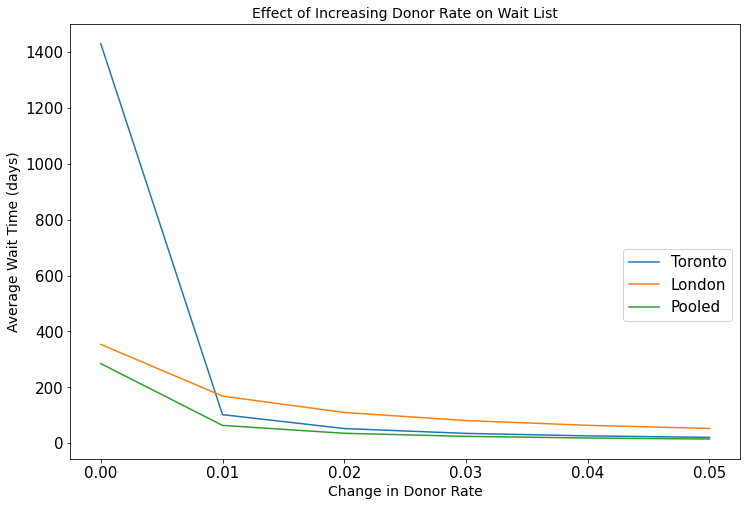

In [161]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(comparison['% Change in Donor Rate'], comparison['Avg. Wq/Toronto'], label = "Toronto")
ax.plot(comparison['% Change in Donor Rate'], comparison['Avg. Wq/London'], label = "London")
ax.plot(comparison['% Change in Donor Rate'], comparison['Avg. Wq/One M-M-1'], label = "Pooled")

ax.set_ylabel("Average Wait Time (days)", fontsize=14)
ax.set_xlabel("Change in Donor Rate", fontsize=14)
plt.legend(bbox_to_anchor=(1, .5))

plt.title('Effect of Increasing Donor Rate on Wait List', fontsize=14)
plt.show()

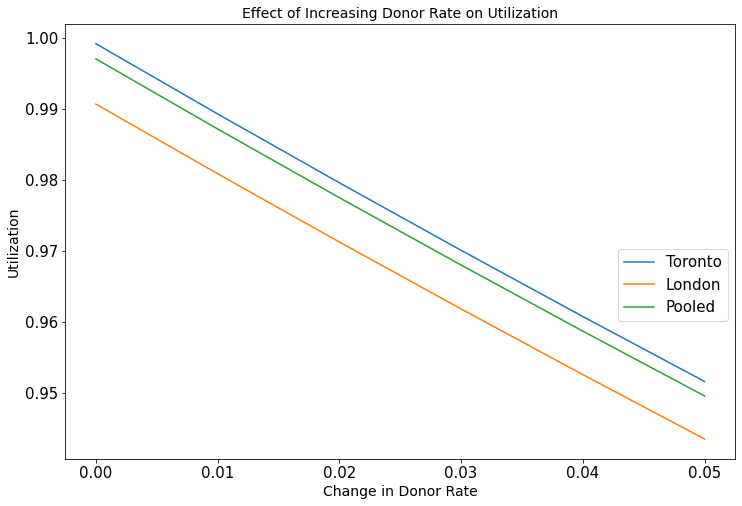

In [165]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(comparison['% Change in Donor Rate'], comparison['Utilization Toronto'], label = "Toronto")
ax.plot(comparison['% Change in Donor Rate'], comparison['Utilization London'], label = "London")
ax.plot(comparison['% Change in Donor Rate'], comparison['Utilization Merge'], label = "Pooled")

ax.set_ylabel("Utilization", fontsize=14)
ax.set_xlabel("Change in Donor Rate", fontsize=14)
plt.legend(bbox_to_anchor=(1, .5))

plt.title('Effect of Increasing Donor Rate on Utilization', fontsize=14)
plt.show()

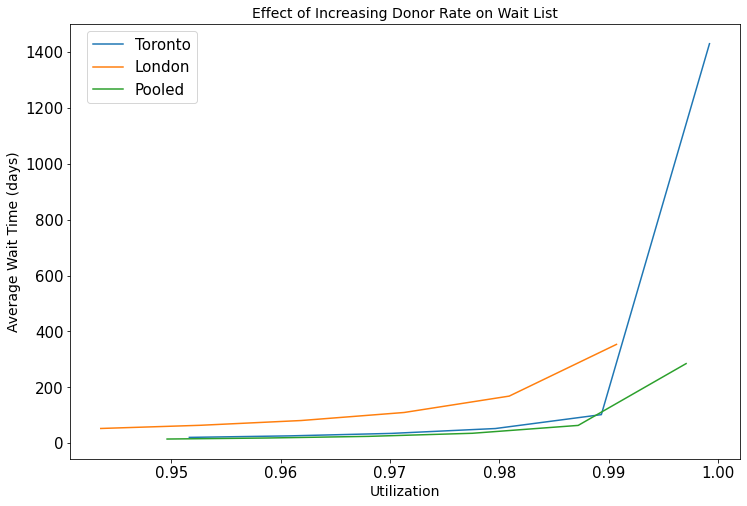

In [166]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(comparison['Utilization Toronto'], comparison['Avg. Wq/Toronto'], label = "Toronto")
ax.plot(comparison['Utilization London'], comparison['Avg. Wq/London'], label = "London")
ax.plot(comparison['Utilization Merge'], comparison['Avg. Wq/One M-M-1'], label = "Pooled")

ax.set_ylabel("Average Wait Time (days)", fontsize=14)
ax.set_xlabel("Utilization", fontsize=14)
plt.legend(bbox_to_anchor=(.2, 1))

plt.title('Effect of Increasing Donor Rate on Wait List', fontsize=14)
plt.show()

These results may see too good to be true, but they show that under M/M/1 assumptions, a small effort in increasing donor availability would yield amazing results. If the donor campaigns and other similar promotions to increase donor arability, they could overcome their current predicament. This information could even provide an argument in favor of keeping the programs separate. 

A counter-argument could be that such improvmenets seem unrealistic. This sentiment might be sign that perhaps some assumptions of the M/M/1 queue are too strong and need to be relaxed to lead to a more realistic outcome.  It mey be intuitive that a greater effort may be necessary to reduce the wait times so drastically.

# Q7. What would happen to the waiting list if the number of patients increased from 0 to 5 percent? 

Because the systems are vey congested, there is almost no room for an increase in the arrival of patients to both wait-list. The utilization is already greater than 99% in both situations. This trivial but important exercise shows that queuing models work under what is called “steady state” or stability. 

IF an increase in the arrival of patients is forecasted, at least an equal increase in donors must follow; otherwise the transplant program’s wait-list start to grow infinity. The solution can be obtained through simulation not mathematical as assumption has been violated. 

In [111]:
wait_time_london =[]
wait_time_toronto = []
wait_time_merge=[]

utilization_toronoto = []
utilization_london = []
utilization_merge= []

for change in np.arange(0.0, .06,0.01):
    𝜌,p0,lq,wq_toronto,L,W = m_m_c(scale_arrival_toronto+scale_arrival_toronto*change ,scale_service_toronto,1) 
    wait_time_toronto.append(wq_toronto*365)
    utilization_toronoto.append(𝜌)
    
    𝜌,p0,lq,wq_london,L,W = m_m_c(scale_arrival_london+scale_arrival_london*change ,scale_service_london,1) 
    wait_time_london.append(wq_london*365)
    utilization_london.append(𝜌)
    
    𝜌,p0,lq,wq_merge,L,W = m_m_c((scale_arrival_london+scale_arrival_toronto)+(scale_arrival_london+scale_arrival_toronto)*change,(scale_service_london+scale_service_toronto),1) 
    wait_time_merge.append(wq_merge*365)
    utilization_merge.append(𝜌)

In [112]:
comparison = pd.DataFrame([utilization_toronoto,wait_time_toronto,utilization_london,wait_time_london,utilization_merge, wait_time_merge]).T
comparison.index = np.arange(0.0, 6,1)
comparison.reset_index(inplace=True)
comparison.columns=["% Change in Donor Rate","Utilization Toronto","Avg. Wq/Toronto","Utilization London",'Avg. Wq/London',"Utilization Merge",'Avg. Wq/One M-M-1']

comparison.round(2)

,% Change in Donor Rate,Utilization Toronto,Avg. Wq/Toronto,Utilization London,Avg. Wq/London,Utilization Merge,Avg. Wq/One M-M-1
0,0.0,1.00,1430.26,0.99,353.83,1.00,284.99
1,1.0,1.01,-122.07,1.00,-5351.30,1.01,-119.12
2,2.0,1.02,-59.14,1.01,-318.38,1.02,-49.84
3,3.0,1.03,-39.28,1.02,-165.63,1.03,-31.74
4,4.0,1.04,-29.55,1.03,-112.63,1.04,-23.40
5,5.0,1.05,-23.77,1.04,-85.72,1.05,-18.61


# Q8. What would happen if the system has more variation than expected in the arrival process? What would you do in this situation?

If we fix the exponential service time, and relax the inter-arrival time, we are talking about G/M/1 system. 

In [20]:
wait_time_london =[]
wait_time_toronto = []
wait_time_merged = []

queue_size_london =[]
queue_size_toronto = []
queue_size_merged = []

for cv_s in np.arange(1,2,.1):
    cv_a = 1
    𝜌,lq_london,wq_london,L,W = g_g_c(1/scale_service_london,cv_s,1/scale_arrival_london ,cv_a,1)
    𝜌,lq_toronto,wq_toronto,L,W = g_g_c(1/scale_service_toronto,cv_s,1/scale_arrival_toronto ,cv_a,1)
    𝜌,lq_merged,wq_merged,L,W = g_g_c(1/(scale_service_toronto+scale_service_london),cv_s,1/(scale_arrival_toronto+scale_arrival_london) ,cv_a,1)
    
    wait_time_toronto.append(wq_toronto*365)
    wait_time_london.append(wq_london*365)
    wait_time_merged.append(wq_merged*365)
    
    queue_size_london.append(lq_london)
    queue_size_toronto.append(lq_toronto)
    queue_size_merged.append(lq_merged)

In [22]:
comparison = pd.DataFrame([wait_time_toronto,wait_time_london,queue_size_toronto,queue_size_london]).T
comparison.index = np.arange(1,2,.1)
comparison.reset_index(inplace=True)
comparison.columns=['CV Arrival ',"Avg. Wq/Toronto",'Avg. Wq/London',"Avg. Lq/Toronto",'Avg. Lq/London']
comparison.round(2)

,CV Arrival,Avg. Wq/Toronto,Avg. Wq/London,Avg. Lq/Toronto,Avg. Lq/London
0,1.0,1430.26,353.83,854.79,211.46
1,1.1,1580.44,390.98,944.55,233.67
2,1.2,1744.91,431.67,1042.85,257.99
3,1.3,1923.70,475.90,1149.70,284.42
4,1.4,2116.78,523.66,1265.09,312.97
5,1.5,2324.17,574.97,1389.04,343.63
6,1.6,2545.86,629.81,1521.53,376.41
7,1.7,2781.85,688.19,1662.57,411.30
8,1.8,3032.15,750.11,1812.16,448.30
9,1.9,3296.74,815.57,1970.30,487.42


From the above table, we can see that the larger variation allowed by the G/M/1 formulation means worse performances. 

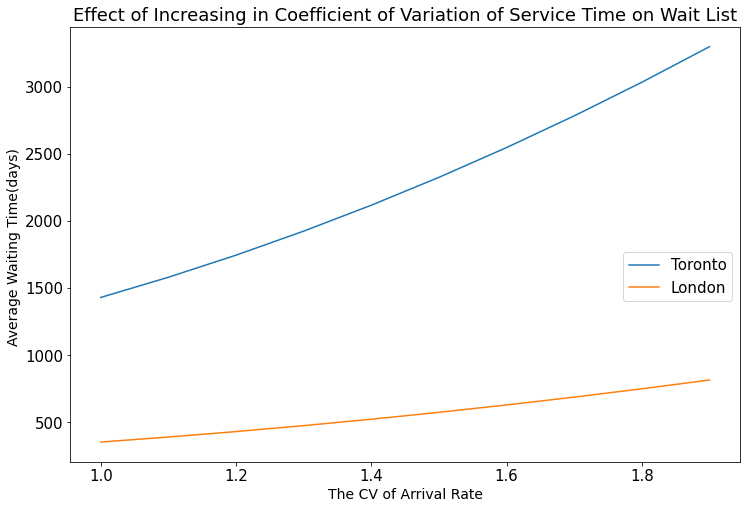

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,2,.1), wait_time_toronto, label = "Toronto")
ax.plot(np.arange(1,2,.1), wait_time_london, label = "London")
ax.set_ylabel("Average Waiting Time(days) ", fontsize=14)
ax.set_xlabel("The CV of Arrival Rate", fontsize=14)
plt.legend(bbox_to_anchor=(1, .5))
plt.title('Effect of Increasing in Coefficient of Variation of Service Time on Wait List')
plt.show()  

In [109]:
wait_time_london =[]
wait_time_toronto = []
wait_time_merge=[]

cv_arrival_merge_list = []
cv_arrival_london_list=[]
cv_arrival_toronto_list=[]

std_arrival_merge_list = []
std_arrival_toronto_list=[]
std_arrival_london_list= []       

𝜌_merge_list = []
𝜌_toronto_list=[]
𝜌_london_list= []       


cv_s = 1
cv_a = 1
for cv_a_london in np.arange(0,2,.1):
    std_arrival_london = cv_a_london * (1/scale_arrival_london)

    for cv_a_toronto in np.arange(1,2,.1):
        std_arrival_toronto = cv_a_toronto * 1/scale_arrival_toronto
        std_arrival_toronto_list.append(std_arrival_toronto*365)


        std_arrival_merge = np.sqrt(std_arrival_london**2 + std_arrival_toronto**2)
        std_arrival_merge_list.append(std_arrival_merge*365)
       
        std_arrival_london_list.append(std_arrival_london*365)
        cv_arrival_london_list.append(cv_a_london)

        cv_arrival_merge = std_arrival_merge/(1/scale_arrival_toronto+1/scale_arrival_london)
        cv_arrival_merge_list.append(cv_arrival_merge)
        cv_arrival_toronto_list.append(cv_a_toronto)

        𝜌,lq,wq_london,L,W = g_g_c(1/scale_service_london,cv_s,1/scale_arrival_london ,cv_a_london,1)
        𝜌_london_list.append(𝜌)
        wait_time_london.append(wq*365)

        𝜌,lq,wq,L,W = g_g_c(1/scale_service_toronto,cv_s,1/scale_arrival_toronto ,cv_a_toronto,1)
        𝜌_toronto_list.append(𝜌)
        wait_time_toronto.append(wq*365)

        𝜌,lq,wq,L,W = g_g_c(1/(scale_service_toronto+scale_service_london) ,cv_s,1/(scale_arrival_toronto+scale_arrival_london) ,cv_arrival_merge,1)
        𝜌_merge_list.append(𝜌)
        wait_time_merge.append(wq*365)

        
        #print(std_arrival_london_list)
        

In [110]:
comparison = pd.DataFrame([cv_arrival_london_list,std_arrival_london_list,cv_arrival_toronto_list,std_arrival_toronto_list, cv_arrival_merge_list,\
                           std_arrival_merge_list,wait_time_toronto,wait_time_london, wait_time_merge,
                          𝜌_london_list,𝜌_toronto_list,𝜌_merge_list]).T.round(3)
comparison.columns=['CV London','Std London','CV Toronto','Std Toronto' ,'CV Merge','Std Merge' , "Avg. Wq/Toronto",'Avg. Wq/London',\
                    'Avg. Wq/One M-M-1','Utilization London','Utilization Toronto','Utilization Merge']
comparison.head()

,CV London,Std London,CV Toronto,Std Toronto,CV Merge,Std Merge,Avg. Wq/Toronto,Avg. Wq/London,Avg. Wq/One M-M-1,Utilization London,Utilization Toronto,Utilization Merge
0,0.0,0.0,1.0,1.115,0.250,1.115,1430.258,464.057,151.394,0.991,0.999,0.997
1,0.0,0.0,1.1,1.227,0.275,1.227,1580.435,151.394,153.263,0.991,0.999,0.997
2,0.0,0.0,1.2,1.338,0.300,1.338,1744.915,153.263,155.310,0.991,0.999,0.997
3,0.0,0.0,1.3,1.450,0.325,1.450,1923.697,155.310,157.534,0.991,0.999,0.997
4,0.0,0.0,1.4,1.561,0.350,1.561,2116.782,157.534,159.937,0.991,0.999,0.997


In [104]:
comparison.tail()

,CV London,Std London,CV Toronto,Std Toronto,CV Merge,Std Merge,Avg. Wq/Toronto,Avg. Wq/London,Avg. Wq/One M-M-1,Utilization London,Utilization Toronto,Utilization Merge
95,1.9,6.361,1.5,1.673,1.474,6.577,2324.169,449.374,451.955,0.991,0.999,0.997
96,1.9,6.361,1.6,1.785,1.480,6.607,2545.859,451.955,454.713,0.991,0.999,0.997
97,1.9,6.361,1.7,1.896,1.487,6.637,2781.852,454.713,457.650,0.991,0.999,0.997
98,1.9,6.361,1.8,2.008,1.494,6.670,3032.147,457.650,460.764,0.991,0.999,0.997
99,1.9,6.361,1.9,2.119,1.502,6.705,3296.745,460.764,464.057,0.991,0.999,0.997


In [105]:
comparison.pivot(index=['CV London','Std London'], columns=['CV Toronto','Std Toronto'], values='CV Merge').round(2)


,CV Toronto,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
,Std Toronto,1.115,1.227,1.338,1.450,1.561,1.673,1.785,1.896,2.008,2.119
CV London,Std London,,,,,,,,,,
1.0,3.348,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.88,0.89
1.1,3.683,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95
1.2,4.017,0.93,0.94,0.95,0.96,0.97,0.98,0.98,1.00,1.01,1.02
1.3,4.352,1.01,1.01,1.02,1.03,1.04,1.04,1.05,1.06,1.07,1.08
1.4,4.687,1.08,1.09,1.09,1.10,1.11,1.12,1.12,1.13,1.14,1.15
1.5,5.022,1.15,1.16,1.16,1.17,1.18,1.19,1.19,1.20,1.21,1.22
1.6,5.357,1.23,1.23,1.24,1.24,1.25,1.26,1.26,1.27,1.28,1.29
1.7,5.691,1.30,1.30,1.31,1.32,1.32,1.33,1.34,1.34,1.35,1.36


In [79]:
comparison = pd.DataFrame([cv_arrival_london_list,cv_arrival_toronto_list, cv_arrival_merge_list, wait_time_toronto,wait_time_london, wait_time_merge]).T.round(2)
comparison.columns=['CV Arrival London','CV Arrival Toronto', 'CV Arrival Merge', "Avg. Wq/Toronto",'Avg. Wq/London','Avg. Wq/One M-M-1']
comparison[comparison['CV Arrival London']==1]

,CV Arrival London,CV Arrival Toronto,CV Arrival Merge,Avg. Wq/Toronto,Avg. Wq/London,Avg. Wq/One M-M-1
0,1.0,1.0,0.79,1430.26,353.83,231.57
1,1.0,1.1,0.80,1580.44,353.83,233.44
2,1.0,1.2,0.81,1744.91,353.83,235.49
3,1.0,1.3,0.82,1923.70,353.83,237.71
4,1.0,1.4,0.83,2116.78,353.83,240.11
5,1.0,1.5,0.84,2324.17,353.83,242.69
6,1.0,1.6,0.85,2545.86,353.83,245.45
7,1.0,1.7,0.86,2781.85,353.83,248.39
8,1.0,1.8,0.87,3032.15,353.83,251.50
9,1.0,1.9,0.89,3296.74,353.83,254.80


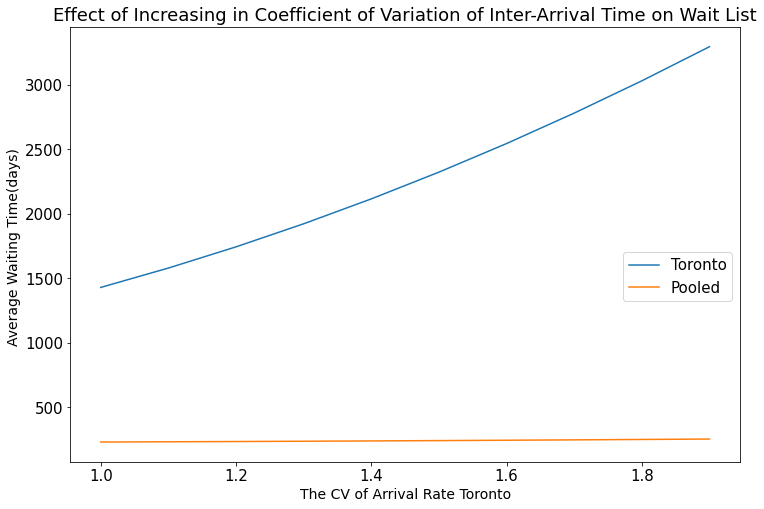

In [93]:
fig,ax = plt.subplots(figsize=(12,8))
df = comparison[comparison['CV Arrival London']==1]
ax.plot(df['CV Arrival Toronto'],df['Avg. Wq/Toronto'], label = "Toronto")
#ax.plot(df['CV Arrival Toronto'],df['Avg. Wq/London'], label = "London")
ax.plot(df['CV Arrival Toronto'],df['Avg. Wq/One M-M-1'], label = "Pooled")
ax.set_ylabel("Average Waiting Time(days) ", fontsize=14)
ax.set_xlabel("The CV of Arrival Rate Toronto", fontsize=14)
plt.legend(bbox_to_anchor=(1, .5))
plt.title('Effect of Increasing in Coefficient of Variation of Inter-Arrival Time on Wait List')
plt.show() 

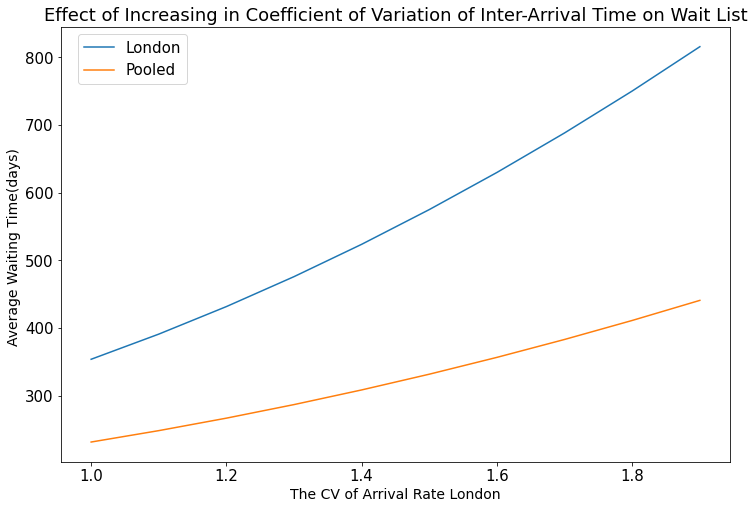

In [99]:
df = comparison[comparison['CV Arrival Toronto']==1]
fig,ax = plt.subplots(figsize=(12,8))
#ax.plot(df['CV Arrival London'],df['Avg. Wq/Toronto'], label = "Toronto")
ax.plot(df['CV Arrival London'],df['Avg. Wq/London'], label = "London")
ax.plot(df['CV Arrival London'],df['Avg. Wq/One M-M-1'], label = "Pooled")
ax.set_ylabel("Average Waiting Time(days) ", fontsize=14)
ax.set_xlabel("The CV of Arrival Rate London", fontsize=14)
plt.legend(bbox_to_anchor=(.2, 1))
plt.title('Effect of Increasing in Coefficient of Variation of Inter-Arrival Time on Wait List')
plt.show() 


When the CV of arrival rate in Toronto is large, the merge program is not beneficial for London any more! 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


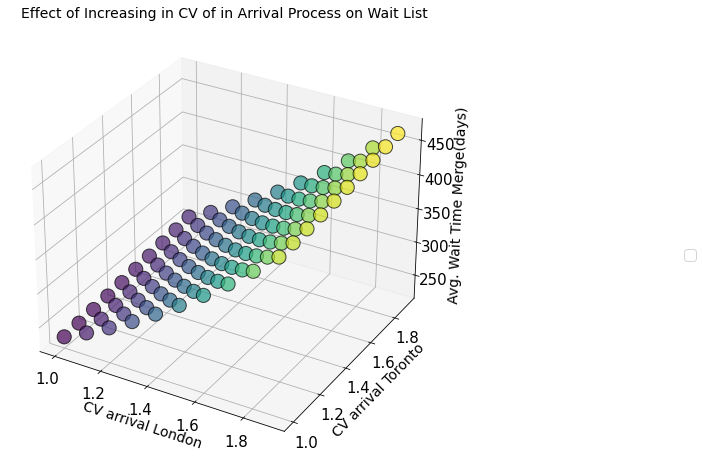

In [78]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cv_arrival_london_list,
           cv_arrival_toronto_list, wait_time_merge,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=wait_time_merge)
ax.set_ylabel("CV arrival Toronto", fontsize=14)
ax.set_xlabel("CV arrival London", fontsize=14)
ax.set_zlabel("Avg. Wait Time Merge(days)", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))

plt.title('Effect of Increasing in CV of in Arrival Process on Wait List', fontsize=14)
plt.show()
plt.show()

More variability in arrival process, will yield high avg. wait time in merged system. Since the arrival rate in Toronto is more than London, the avg. wait time in merged system is more sensitive to CV of arrival process in Toronto than to London. 

# Q9. What specific recommendations would you make to improve the system?

Programs need to invest in donor campaigns and other similar promotions to increase donor availability, they could overcome their current predicament. 

Merged system has always less waiting time in different setting. Though London will not always benefit from this, but it is recommended to merge two system to reduce the Ontario’s wait list. 


# Simulation Based Solution

# Q1 . How busy are the systems in terms of their utilization rates?

# Warm up- Period Identification 

In [140]:
def run_trail(s,N,max_sim_time,warmup):    
    
    ciw.seed(s)
    Q = ciw.Simulation(N,tracker=ciw.trackers.SystemPopulation())
    Q.simulate_until_max_time(max_sim_time)
    recs = Q.get_all_records()
    df = pd.DataFrame(recs)
    
    df_steady_state = df.loc[df['arrival_date']>warmup]
    df_steady_state['system_time'] = df_steady_state.exit_date - df_steady_state.arrival_date
    df_steady_state['inter_arrival'] = df_steady_state.arrival_date - df_steady_state.arrival_date.shift(1,fill_value=0)   
    df_steady_state['arrival_year']= df_steady_state['arrival_date']//1
    
    
    system_time = np.mean(df_steady_state['system_time'])
    average_waits= np.mean(df_steady_state['waiting_time'])
    num_at_queue = np.mean(df_steady_state['queue_size_at_arrival'])
    P_0 = df_steady_state[df_steady_state['waiting_time']==0].shape[0]/df_steady_state.shape[0]
    cv_arrival = df_steady_state['inter_arrival'].std()/df_steady_state['inter_arrival'].mean()
    cv_service = df_steady_state['service_time'].std()/df_steady_state['service_time'].mean()
    utilization = df_steady_state['service_time'].mean()/df_steady_state['inter_arrival'].mean()
    
    return max_sim_time,average_waits, system_time, num_at_queue, P_0, cv_service,cv_arrival,utilization

In [141]:
from os import cpu_count
from joblib import Parallel, delayed
num_cpu= cpu_count() # the number of available cpus in your computer

In [142]:
max_time = 3000
utilization_agg =[]
warmup = 0 
cooldown = max_time

   
### running for different max time
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(scale_arrival_london)], 
    service_distributions=[ciw.dists.Exponential(scale_service_london)],
    number_of_servers=[1])

Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())
results = Parallel(n_jobs=cpu_count())(delayed(run_trail)(trail,N,time,warmup) for time in range(100,5000,500) for trail in range(0,50))

In [174]:
result_london = pd.DataFrame(results)
result_london.columns = ['sim_time','avg_wait_time','avg_sys_time','avg_num_queue','prob_zero_queue','cv_service','cv_arrival','utilization']
result_london['avg_wait_time'] = result_london['avg_wait_time']*365
result_london['avg_sys_time'] = result_london['avg_sys_time']*365
result_london.head()

,sim_time,avg_wait_time,avg_sys_time,avg_num_queue,prob_zero_queue,cv_service,cv_arrival,utilization
0,100,83.637875,86.914571,25.823987,0.031001,1.000436,0.999709,0.977021
1,100,72.496530,75.776230,22.497392,0.035295,0.997818,1.010890,0.968146
2,100,201.726857,205.065024,60.519746,0.007272,1.003451,0.999966,1.005568
3,100,117.013554,120.323378,35.415370,0.027108,0.998226,0.991367,0.986534
4,100,111.430047,114.720544,33.804062,0.031305,1.005665,1.007256,0.968458


In [175]:
result_london.tail()

,sim_time,avg_wait_time,avg_sys_time,avg_num_queue,prob_zero_queue,cv_service,cv_arrival,utilization
495,4600,205.639447,208.945919,62.229284,0.013931,1.000557,0.999537,0.986185
496,4600,298.787073,302.105771,90.108288,0.010097,0.999391,1.002330,0.990044
497,4600,362.306680,365.629745,109.148622,0.006959,1.001926,0.998184,0.992951
498,4600,276.545956,279.862608,83.421724,0.010049,1.001995,1.000642,0.990167
499,4600,234.608374,237.917031,71.046029,0.012990,0.998032,1.002177,0.987297


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


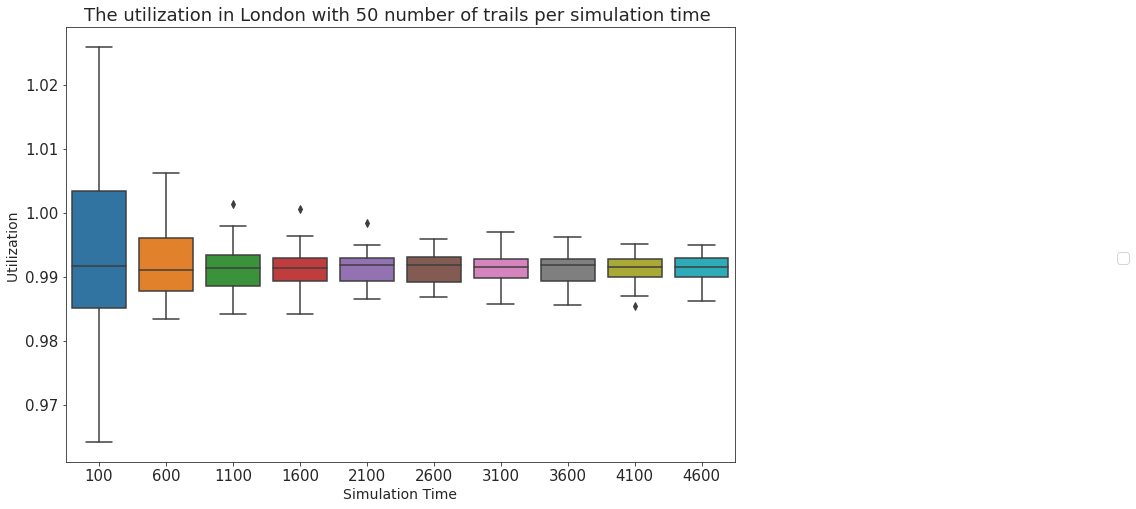

In [183]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=result_london, x='sim_time', y='utilization')
ax.set_ylabel("Utilization ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The utilization in London with 50 number of trails per simulation time ')
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


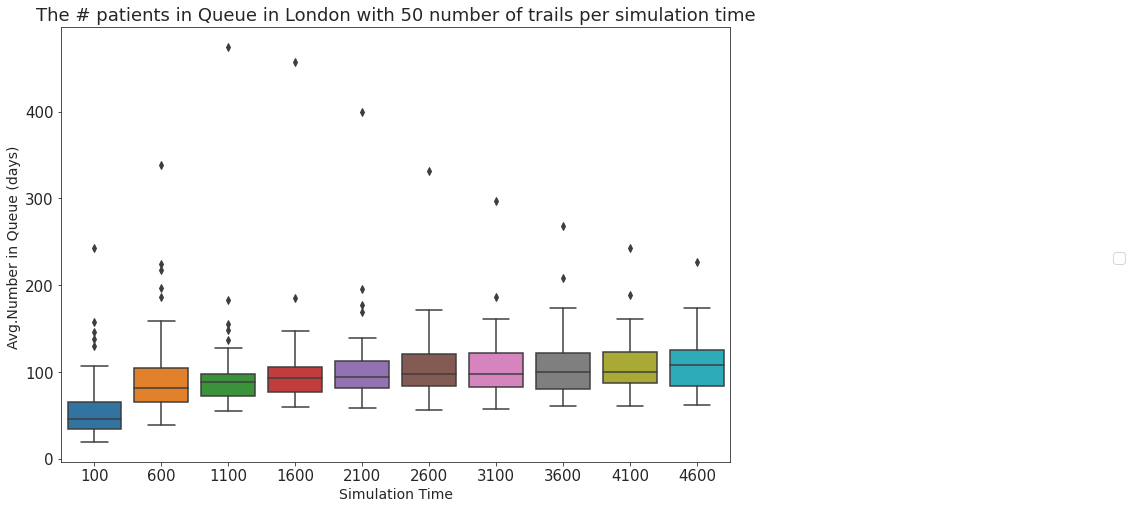

In [184]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=result_london, x='sim_time', y='avg_num_queue')
ax.set_ylabel("Avg.Number in Queue (days) ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The # patients in Queue in London with 50 number of trails per simulation time')
plt.show() 


In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=result_london, x='sim_time', y='avg_wait_time')
ax.set_ylabel("Avg. Wait Time (days) ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The avg. wait time in London with different number of trails')
plt.show() 

In [172]:
result_aggregated_london = result_london.groupby('sim_time')['avg_wait_time','avg_sys_time','avg_num_queue','cv_service','cv_arrival','utilization'].mean().reset_index()
result_aggregated_london.head(10)

,sim_time,avg_wait_time,avg_sys_time,avg_num_queue,cv_service,cv_arrival,utilization
0,100,199.012912,202.332544,59.891175,1.001457,1.003450,0.992361
1,600,318.939176,322.256166,96.156948,1.000965,1.000651,0.991710
2,1100,327.424036,330.741487,98.694986,1.000542,1.000309,0.991139
3,1600,338.245482,341.563191,101.941265,1.000540,1.000208,0.991303
4,2100,351.363752,354.681831,105.878718,1.000499,1.000111,0.991302
5,2600,355.440627,358.758905,107.116205,1.000331,0.999934,0.991261
6,3100,356.037673,359.356015,107.287107,1.000205,0.999791,0.991260
7,3600,357.863966,361.182022,107.867175,1.000217,0.999750,0.991191
8,4100,357.485268,360.803348,107.757084,1.000197,0.999982,0.991267
9,4600,360.007871,363.325908,108.513339,1.000204,0.999942,0.991315


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


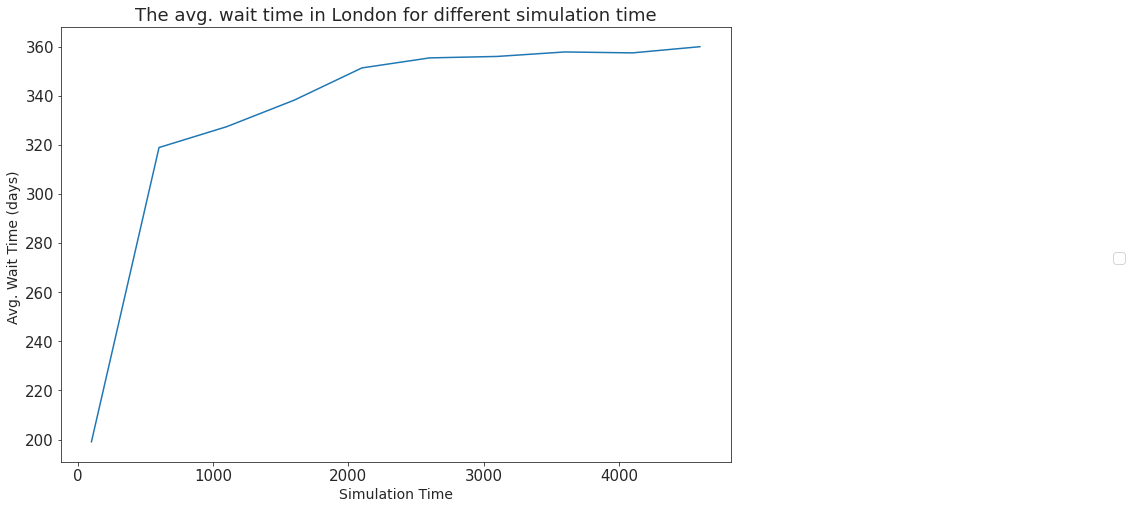

In [185]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(result_aggregated_london['sim_time'],result_aggregated_london['avg_wait_time'])
ax.set_ylabel("Avg. Wait Time (days) ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The avg. wait time in London for different simulation time')
plt.show() 

In [194]:
max_time = 2000
warmup = 100
results = Parallel(n_jobs=cpu_count())(delayed(run_trail)(trail,N,max_time,warmup) for trail in range(0,50))

In [195]:
result_london_final = pd.DataFrame(results)
result_london_final.columns = ['sim_time','avg_wait_time','avg_sys_time','avg_num_queue','prob_zero_queue','cv_service','cv_arrival','utilization']
result_london_final['avg_wait_time'] = result_london_final['avg_wait_time']*365
result_london_final['avg_sys_time'] = result_london_final['avg_sys_time']*365
result_london_final.groupby('sim_time')['avg_wait_time','avg_sys_time','avg_num_queue','utilization'].mean()


#Avg. Time in queue:353.826 days
#Avg. Time in system:357.143 days 
#Avg. # in queue:105.687
#Avg. # in system:106.678
#Utilization:0.991

,avg_wait_time,avg_sys_time,avg_num_queue,cv_service,cv_arrival,utilization
sim_time,,,,,,
2000,356.571345,359.889425,107.453416,1.000551,22.782143,0.941537


In [265]:
result_london_final.groupby('sim_time')['avg_wait_time','avg_sys_time','avg_num_queue','utilization'].std()

,avg_wait_time,avg_sys_time,avg_num_queue,utilization
sim_time,,,,
2000,187.452339,187.456019,56.216059,0.002651


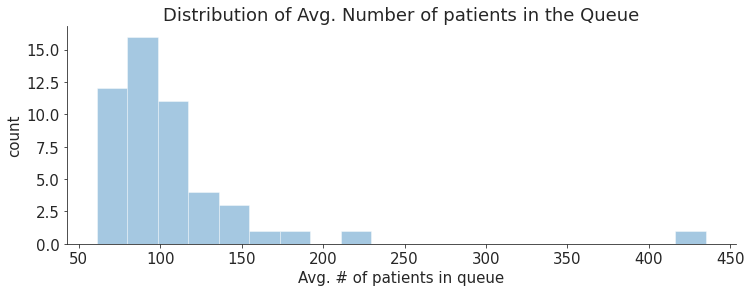

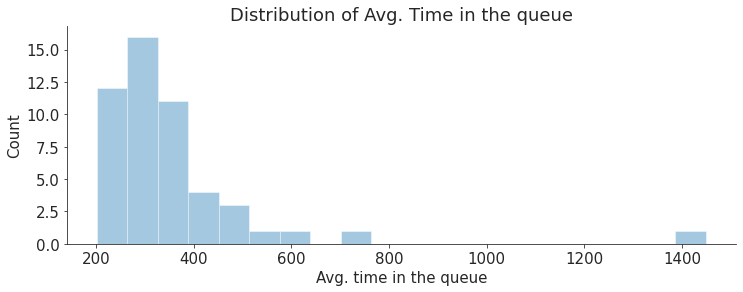

In [214]:
plt.figure(figsize=(12,4))
sns.distplot(result_london_final['avg_num_queue'],kde=False,bins=20)
plt.title('Distribution of Avg. Number of patients in the Queue - London')
plt.xlabel('Avg. # of patients in queue')
plt.ylabel('count')
sns.despine()
plt.show()

#service time distribution plot
plt.figure(figsize=(12,4))
sns.distplot(result_london_final['avg_wait_time'],kde=False,bins=20)
plt.title('Distribution of Avg. Time in the queue - London')
plt.xlabel('Avg. time in the queue')
plt.ylabel('Count')
sns.despine()
plt.show()  

# Toronto 

In [202]:
warmup = 0 

N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(scale_arrival_toronto)], 
    service_distributions=[ciw.dists.Exponential(scale_service_toronto)],
    number_of_servers=[1])

Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())
results = Parallel(n_jobs=cpu_count())(delayed(run_trail)(trail,N,time,warmup) for time in range(100,5000,500) for trail in range(0,50))

In [267]:
result_toronto = pd.DataFrame(results)
result_toronto.columns = ['sim_time','avg_wait_time','avg_sys_time','avg_num_queue','prob_zero_queue','cv_service','cv_arrival','utilization']
result_toronto['avg_wait_time'] = result_toronto['avg_wait_time']*365
result_toronto['avg_sys_time'] = result_toronto['avg_sys_time']*365
result_toronto.head(20)

,sim_time,avg_wait_time,avg_sys_time,avg_num_queue,prob_zero_queue,cv_service,cv_arrival,utilization
0,4000,536.732583,537.846660,482.057035,0.000262,0.999834,247.922804,0.749981
1,4000,1076.972215,1078.087535,966.175875,0.000180,1.002151,247.984619,0.750586
2,4000,364.286078,365.399800,327.578088,0.001128,0.999638,247.696071,0.748757
3,4000,968.024738,969.141528,866.703381,0.000964,1.000255,247.796764,0.750329
4,4000,603.391671,604.505980,541.802229,0.000756,1.002352,247.894496,0.749800
5,4000,951.656975,952.771867,854.583797,0.000000,1.000595,247.879900,0.750064
6,4000,769.082419,770.198538,688.990183,0.000164,1.000237,247.761931,0.750207
7,4000,349.878603,350.992936,314.158938,0.001882,1.000669,247.518433,0.747935
8,4000,949.469756,950.585114,852.002363,0.000035,0.999134,247.883585,0.750254
9,4000,1140.941754,1142.058509,1022.496131,0.000000,1.000107,247.826613,0.750675


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


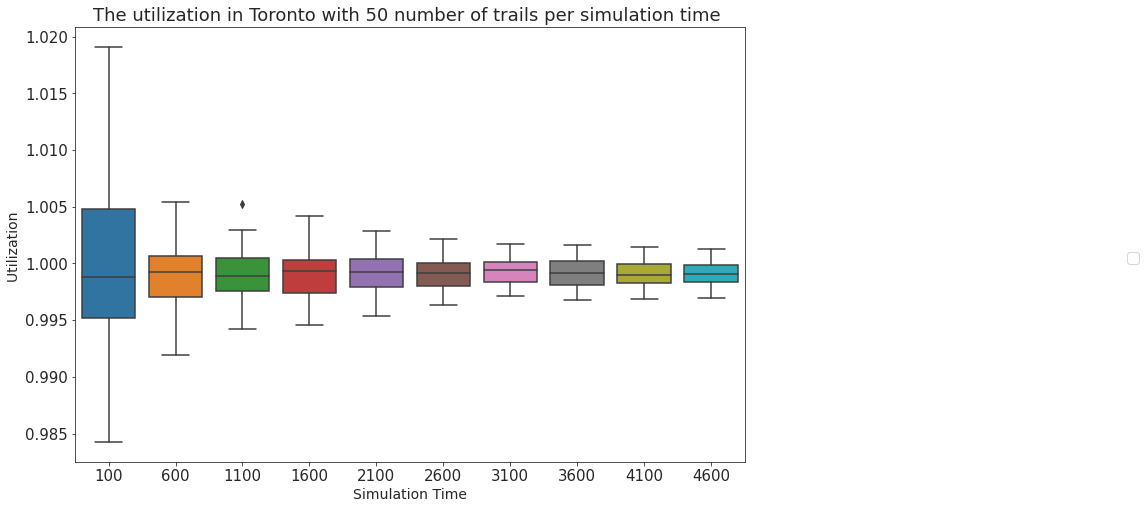

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


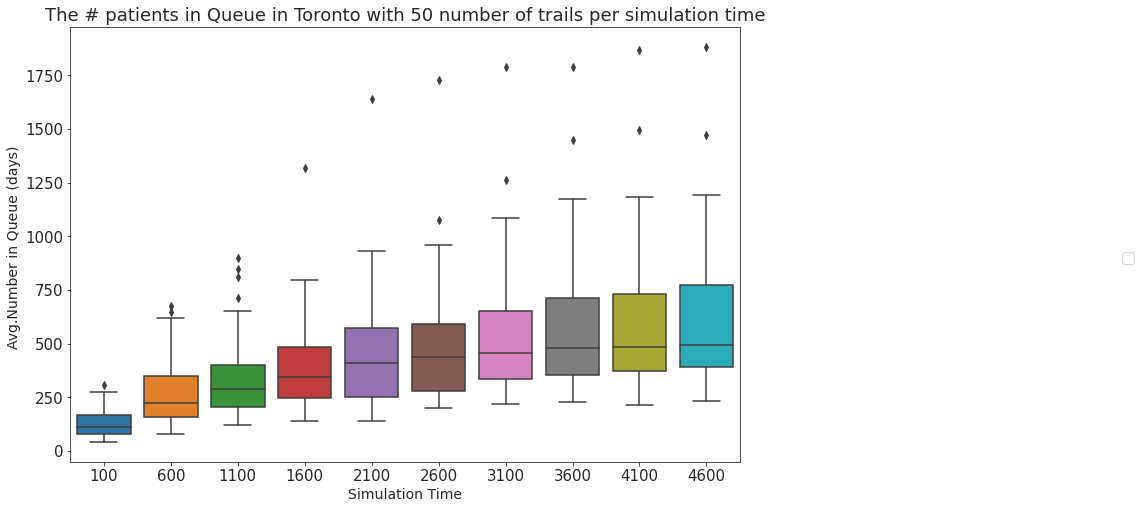

In [205]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=result_toronto, x='sim_time', y='utilization')
ax.set_ylabel("Utilization ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The utilization in Toronto with 50 number of trails per simulation time ')
plt.show() 


fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=result_toronto, x='sim_time', y='avg_num_queue')
ax.set_ylabel("Avg.Number in Queue (days) ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The # patients in Queue in Toronto with 50 number of trails per simulation time')
plt.show() 


In [206]:
result_aggregated_toronto = result_toronto.groupby('sim_time')['avg_wait_time','avg_sys_time','avg_num_queue','cv_service','cv_arrival','utilization'].mean().reset_index()
result_aggregated_toronto.head(10)

,sim_time,avg_wait_time,avg_sys_time,avg_num_queue,cv_service,cv_arrival,utilization
0,100,142.111344,143.226044,127.532343,1.001446,1.000260,0.999745
1,600,303.794994,304.909348,272.657951,1.000309,1.000431,0.998912
2,1100,384.643650,385.758253,345.100664,0.999993,1.000040,0.999048
3,1600,447.376452,448.490838,401.426493,1.000109,1.000056,0.998989
4,2100,507.778341,508.892886,455.562037,1.000123,1.000065,0.999113
5,2600,544.769919,545.884428,488.813886,1.000197,1.000036,0.999050
6,3100,588.794149,589.908732,528.245401,1.000165,1.000111,0.999217
7,3600,631.581551,632.696049,566.672105,1.000174,1.000121,0.999190
8,4100,663.740556,664.855046,595.531387,1.000261,1.000110,0.999096
9,4600,681.861558,682.976013,611.854331,1.000293,1.000085,0.999098


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


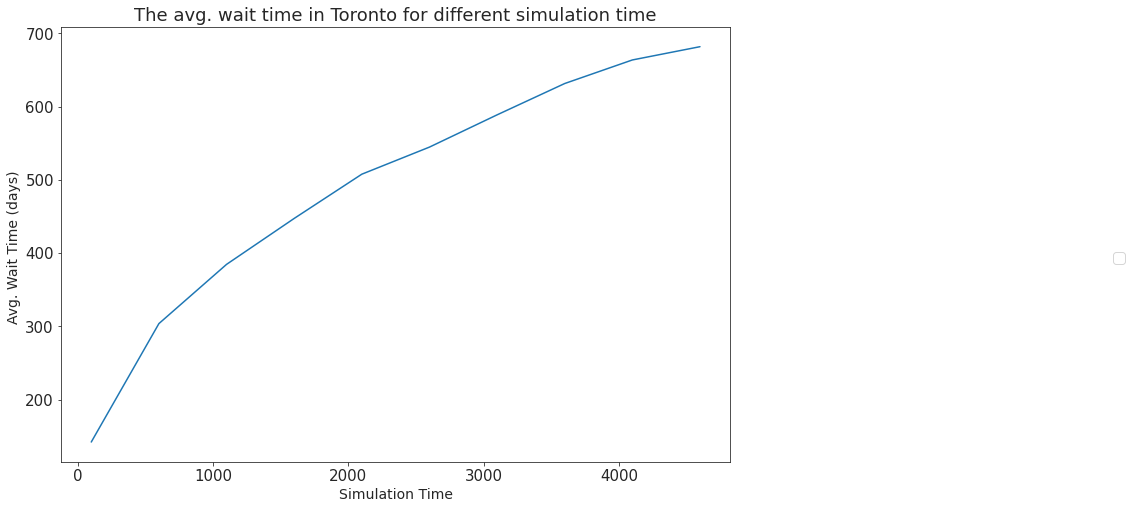

In [207]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(result_aggregated_toronto['sim_time'],result_aggregated_toronto['avg_wait_time'])
ax.set_ylabel("Avg. Wait Time (days) ", fontsize=14)
ax.set_xlabel("Simulation Time", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))
plt.title('The avg. wait time in Toronto for different simulation time')
plt.show() 